Utilziar recursos gráficos e bibliotecas são primordiais para uma análise de dados. 
Neste post, irei demostrar algumas das opções, sem se preocupar com o tratamento de dados e a aprendizado de máquina. Esses dois assuntos eu abordo em outros exercícios, confira os mesmos nos demais links do meu currículo.
Para esta atividade utilizei as bibliotecas seaborn, pandas e matchplot.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Para esse exercício irei utilizar um banco de dados de uma campanha de um banco português que tem aproximadamente 41 mil linhas e 19 colunas.
Esse dataset traz os registros pessoais dos clientes, como idade, profissão, educação entre outros, dados das campanha de telemarketing realizadas, como número de contatos, duração, alguns índices financeiros e a coluna target, que mostra se o cliente aderiu ou não a camapanha.

In [ ]:
import pandas as pd
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/callcenter_marketing.csv')

In [ ]:
dataset.shape

(41188, 19)

In [ ]:
#Apenas para não comprometer os resultados da visualização, vamos verificar e remover os dados faltantes:
dataset.isnull().sum()

idade                             0
profissao                       330
estado_civil                     80
educacao                       1731
inadimplente                   8597
emprestimo_moradia              990
emprestimo_pessoal              990
meio_contato                      0
mes                               0
dia_da_semana                     0
duracao                           0
qtd_contatos_campanha             0
dias_ultimo_contato               0
qtd_contatos_total                0
campanha_anterior                 0
indice_precos_consumidor          0
indice_confianca_consumidor       0
euribor3m                         0
resultado                         0
dtype: int64

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.isnull().sum()

idade                          0
profissao                      0
estado_civil                   0
educacao                       0
inadimplente                   0
emprestimo_moradia             0
emprestimo_pessoal             0
meio_contato                   0
mes                            0
dia_da_semana                  0
duracao                        0
qtd_contatos_campanha          0
dias_ultimo_contato            0
qtd_contatos_total             0
campanha_anterior              0
indice_precos_consumidor       0
indice_confianca_consumidor    0
euribor3m                      0
resultado                      0
dtype: int64

Após essa solução rápida, que não é a mais indicada, podemos começar a explorar os dados através dos gráficos:


Nessa primeira parte, utilizarei a biblioteca Seaborn. Esta é baseada na famosa Matchplot e seus resultados são apresentados por intarface atraentes e de fácil compreensão.

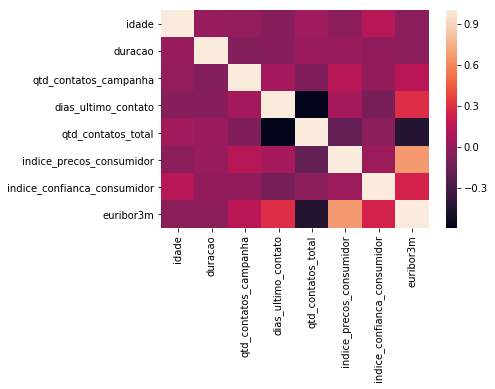

In [ ]:
sns.heatmap(dataset.corr())

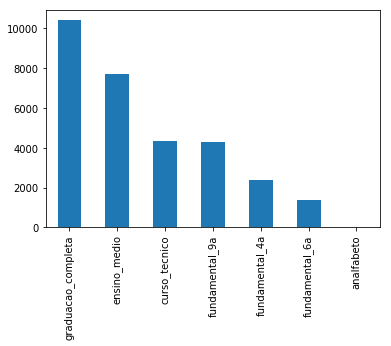

In [ ]:
dataset.educacao.value_counts().plot.bar()

{'boxes': [<matplotlib.lines.Line2D at 0x7f96bb8504a8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f96bb850cc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f96bb85d6d8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f96bb85d390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f96bb850630>,
  <matplotlib.lines.Line2D at 0x7f96bb850978>]}

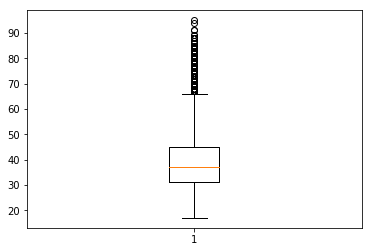

In [ ]:
plt.boxplot(dataset.idade)

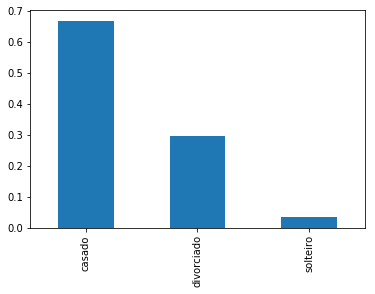

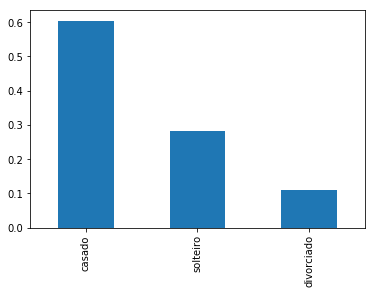

In [ ]:
Outliers = dataset[dataset.idade>70]
Estado_civil = Outliers['estado_civil'].value_counts()/Outliers.shape[0]
Estado_civil.plot.bar()
plt.show()
Inliers = dataset[dataset.idade<=70]
Estado_civil_Inliers = Inliers['estado_civil'].value_counts()/Inliers.shape[0]
Estado_civil_Inliers.plot.bar()

In [ ]:
Inliers.y.value_counts()

no     36328
yes     4438
Name: y, dtype: int64

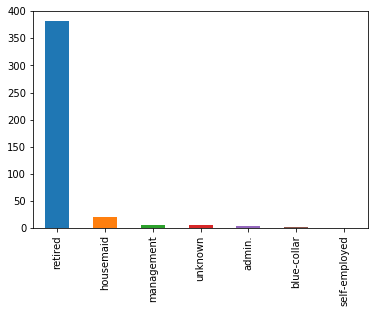

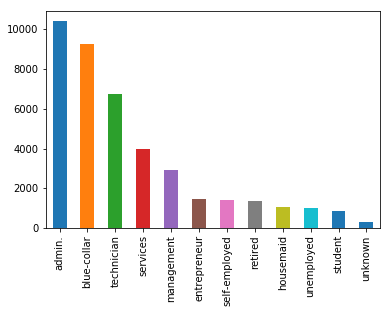

In [ ]:
Trabalho_Outliers = Outliers['job'].value_counts().plot.bar()
plt.show()
Trabalho_Inliers = Inliers['job'].value_counts().plot.bar()

In [ ]:
Educação[7]

'illiterate'

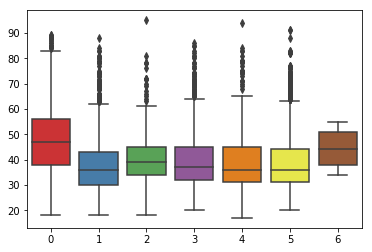

In [ ]:
Educação = dataset.educacao.unique()
data = []
for E in Educação:
    dados = dataset[dataset.educacao==E]['idade']
    data.append(dados)
sns.boxplot( data=data,palette="Set1")

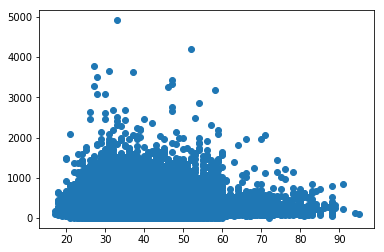

In [ ]:
x=dataset.idade
y=dataset.duracao
plt.scatter(x,y)

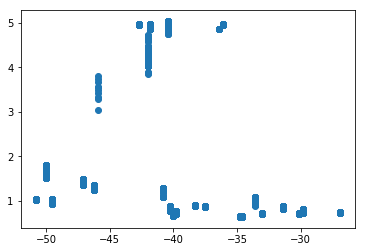

In [ ]:
y = dataset['euribor3m']
x=dataset.indice_confianca_consumidor
plt.scatter(x,y)

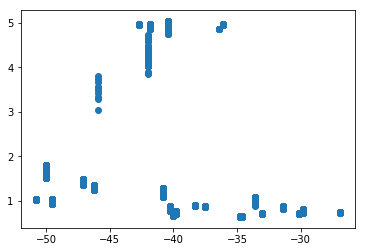

In [ ]:
pd.crosstab(dataset.educacao,dataset.estado_civil, margins=True)

estado_civil,casado,divorciado,solteiro,All
educacao,,,,
analfabeto,15,2,1,18
curso_tecnico,3156,657,1424,5237
ensino_medio,5158,1193,3150,9501
fundamental_4a,3228,489,453,4170
fundamental_6a,1767,182,337,2286
fundamental_9a,4156,565,1316,6037
graduacao_completa,6394,1337,4406,12137
All,23874,4425,11087,39386
